# WELCOME

**Here in this notebook we will take a look on how to operate with DICOM files format.**

In [48]:
# First, let's import useful pyhton libraries
import pydicom
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import cv2
import numpy as np

## What is Dicom file

[<iframe width="853" height="480" src="https://www.youtube.com/embed/eLS9nDVJx5Y" title="What is a DICOM file? Lecture 001" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>](http://)

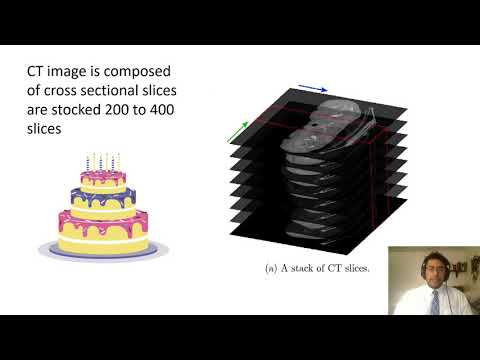

In [49]:
from IPython.display import YouTubeVideo
YouTubeVideo('eLS9nDVJx5Y', width=800, height=450)

In [50]:
# Let's take a look on the training csv file.

train_df = pd.read_csv('../input/unifesp-xray-bodypart-classification/train.csv')
test_df = pd.read_csv('../input/unifesp-x-ray-body-part-classifier/sample_submission.csv')

In [51]:
train_df.head(8)

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483...,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852...,3
5,1.2.826.0.1.3680043.8.498.10053755320637729867...,3
6,1.2.826.0.1.3680043.8.498.10062189329714053601...,14
7,1.2.826.0.1.3680043.8.498.10065930002825553435...,13 20


In [52]:
#Let's  see our Target distribution

bodyparts = {
0 : 'Abdomen' ,
1 :'Ankle' ,
2 :'Cervical Spine',
3 : 'Chest' ,
4 :'Clavicles' ,
5 :'Elbow' ,
6 :'Feet' ,
7 : 'Finger' ,
8 : 'Forearm' ,
9 : 'Hand' ,
10 : 'Hip' ,
11 : 'Knee' ,
12 : 'Lower Leg' ,
13 : 'Lumbar Spine' ,
14 : 'Others' ,
15 :'Pelvis',
16 :'Shoulder' ,
17 :'Sinus' ,
18 : 'Skull' ,
19 : 'Thigh' ,
20 :'Thoracic Spine',
21: 'Wrist',
}



In [53]:
#DICOM file formats contains meta-data that can be useful for deep learning model preprocessing
#I'll use a funciton created by Felipe Kitamura to list the DICOM Tags from the files

def dcmtag2table(folder, list_of_tags):
    """
    # Create a Pandas DataFrame with the <list_of_tags> DICOM tags
    # from the DICOM files in <folder>
    # Parameters:
    #    folder (str): folder to be recursively walked looking for DICOM files.
    #    list_of_tags (list of strings): list of DICOM tags with no whitespaces.
    # Returns:
    #    df (DataFrame): table of DICOM tags from the files in folder.
    """
    list_of_tags = list_of_tags.copy()
    items = []
    table = []
    filelist = []
    print("Listing all files...")
    start = time.time()
    for root, dirs, files in os.walk(folder, topdown=False):
        for name in files:
            filelist.append(os.path.join(root, name))
    print("Time: " + str(time.time() - start))
    print("Reading files...")
    time.sleep(2)
    for _f in tqdm(filelist):
        try:
            ds = pydicom.dcmread(_f, stop_before_pixels=True)
            items = []
            items.append(_f)

            for _tag in list_of_tags:
                if _tag in ds:
                    items.append(ds.data_element(_tag).value)
                else:
                    items.append("Not found")

            table.append((items))
        except:
            print("Skipping non-DICOM: " + _f)

            
    list_of_tags.insert(0, "Filename")
    test = list(map(list, zip(*table)))
    dictone = {}

    for i, _tag in enumerate (list_of_tags):
        dictone[_tag] = test[i]

    df = pd.DataFrame(dictone)
    time.sleep(2)
    print("Finished.")
    return df

## How to read Images from Dicom using Pydicom

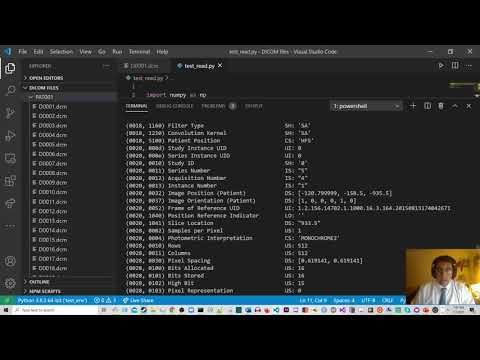

In [54]:
from IPython.display import YouTubeVideo
YouTubeVideo('hWwAFNmPZFQ', width=800, height=450)

In [55]:
tags = ['PhotometricInterpretation','BitsAllocated', 'SOPInstanceUID' ]
dicom_tags_train =  dcmtag2table('../input/unifesp-xray-bodypart-classification/train', tags)
dicom_tags_test = dcmtag2table('../input/unifesp-xray-bodypart-classification/test', tags)

Listing all files...
Time: 1.4754817485809326
Reading files...


100%|██████████| 1738/1738 [00:02<00:00, 654.67it/s]


Finished.
Listing all files...
Time: 0.5440895557403564
Reading files...


100%|██████████| 743/743 [00:01<00:00, 398.73it/s]


Finished.


In [56]:
dicom_tags_train.head()

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID
0,../input/unifesp-xray-bodypart-classification/...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.71157989004260882669...
1,../input/unifesp-xray-bodypart-classification/...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.32467620439025796224...
2,../input/unifesp-xray-bodypart-classification/...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.74856220852423198555...
3,../input/unifesp-xray-bodypart-classification/...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.90865692473901867788...
4,../input/unifesp-xray-bodypart-classification/...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.44687741644515558201...


MONOCHROME1    1659
MONOCHROME2      79
Name: PhotometricInterpretation, dtype: int64
The following images are with Photometric Interpretation MONOCHROME1


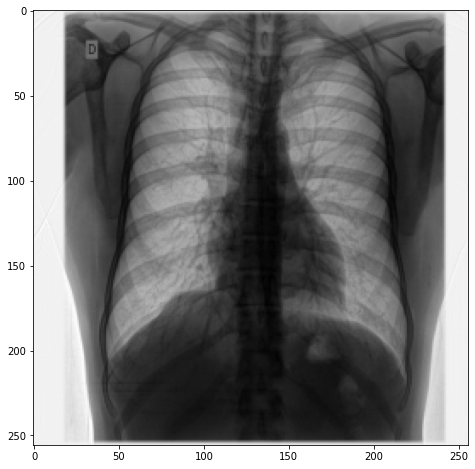

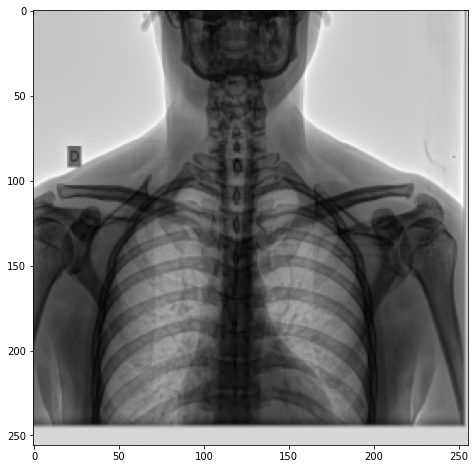

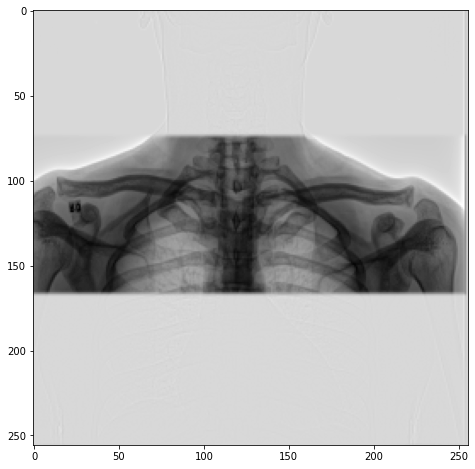

The following images are with Photometric Interpretation MONOCHROME2


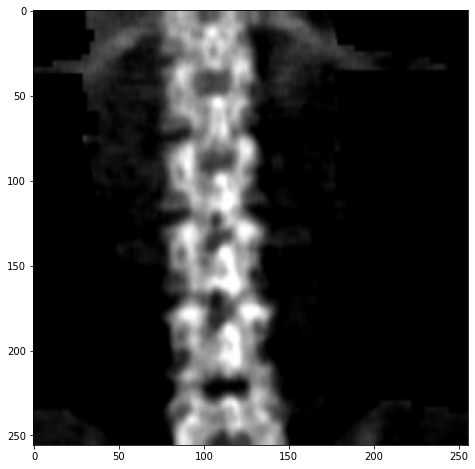

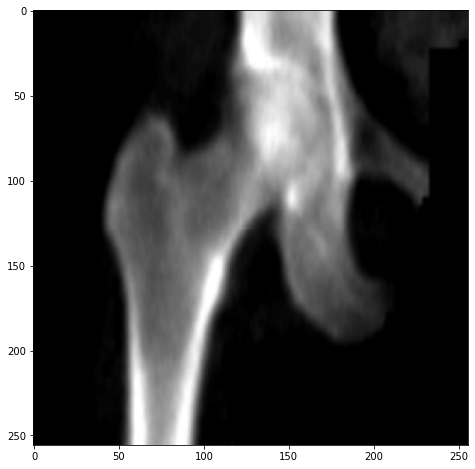

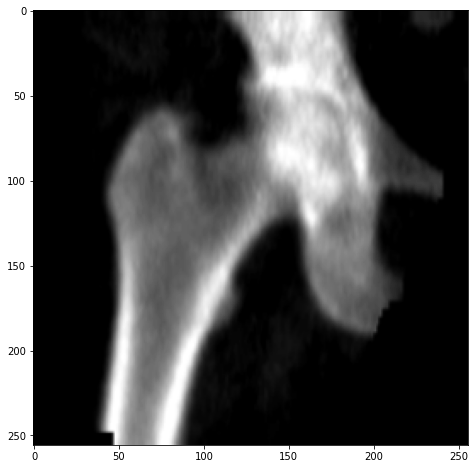

In [57]:
#Let's see the differente type of Photometric Interpreation and how it affects the display of an image

print(dicom_tags_train.PhotometricInterpretation.value_counts())

print('The following images are with Photometric Interpretation MONOCHROME1')
n = 0
for idx,row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME1'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

print('The following images are with Photometric Interpretation MONOCHROME2')

n = 0
for idx, row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME2'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

As you can see, the Photometric Interpretation changes hwo the density of the elements presents in the body will be shown. 
In MONOCHROME1 the element in the image with less density (air) is brighter, the reverse happens in MONCHROME2

The following images are with Photometric Interpretation MONOCHROME1 but will be displayed as MONCHROME2


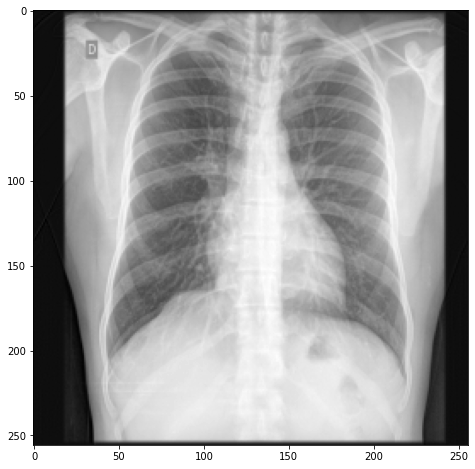

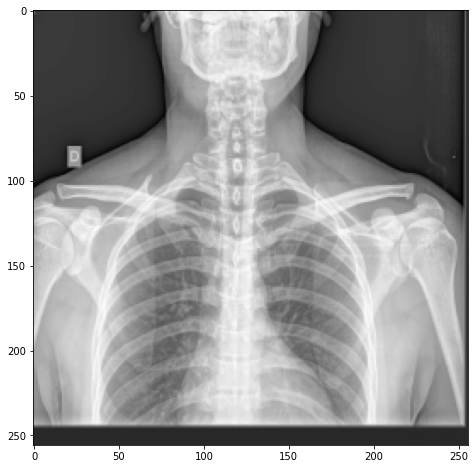

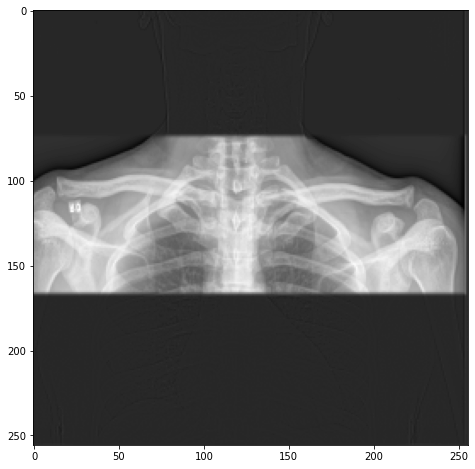

In [58]:
#You can use numpy invert() funciton to change the display of the Photometric Interpratation between two different MONCHROMEs

print('The following images are with Photometric Interpretation MONOCHROME1 but will be displayed as MONCHROME2')
n = 0
for idx,row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME1'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(np.invert(img), cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

In [59]:
train = dicom_tags_train.merge(train_df, on =  'SOPInstanceUID')
test = dicom_tags_test.merge(test_df,on =  'SOPInstanceUID')

In [60]:
labels = ['Abdomen', 'Ankle', 'Cervical Spine',
       'Chest', 'Clavicles', 'Elbow', 'Feet', 'Finger', 'Forearm', 'Hand',
       'Hip', 'Knee', 'Lower Leg', 'Lumbar Spine', 'Others', 'Pelvis',
       'Shoulder', 'Sinus', 'Skull', 'Thigh', 'Thoracic Spine', 'Wrist']

In [61]:
#Create Label from target
def no_to_label(label):
    label_list_string = []
    trimed_label = label.rstrip()
    label_list = trimed_label.split(" ")
    label_list = [int(i) for i in label_list]
    for label in label_list:
        label_list_string.append(bodyparts[label])
    label_string = ' and '.join(label_list_string)
    return label_string

# Create a new column with label
target_list = train['Target'].tolist()
label_column = []

for label in tqdm(target_list):
    label_string = no_to_label(label)
    label_column.append(label_string)
train['Label'] = label_column

#Now we can see the distribution
train['Label'].unique()
    

100%|██████████| 1738/1738 [00:00<00:00, 248447.58it/s]


array(['Chest', 'Clavicles', 'Finger', 'Wrist', 'Abdomen', 'Hand',
       'Cervical Spine', 'Knee', 'Ankle', 'Skull', 'Lumbar Spine',
       'Others', 'Pelvis', 'Feet', 'Shoulder',
       'Lumbar Spine and Thoracic Spine', 'Hip', 'Hand and Wrist',
       'Thoracic Spine', 'Abdomen and Chest', 'Lower Leg', 'Elbow',
       'Sinus', 'Forearm', 'Hip and Thigh', 'Forearm and Shoulder',
       'Pelvis and Thigh', 'Knee and Lower Leg', 'Thigh',
       'Ankle and Lower Leg', 'Elbow and Forearm',
       'Ankle and Knee and Lower Leg',
       'Cervical Spine and Thoracic Spine', 'Ankle and Feet',
       'Cervical Spine and Lumbar Spine and Thoracic Spine',
       'Chest and Finger', 'Chest and Feet', 'Hip and Knee and Thigh',
       'Chest and Pelvis', 'Abdomen and Pelvis', 'Finger and Hand'],
      dtype=object)

<AxesSubplot:xlabel='Label'>

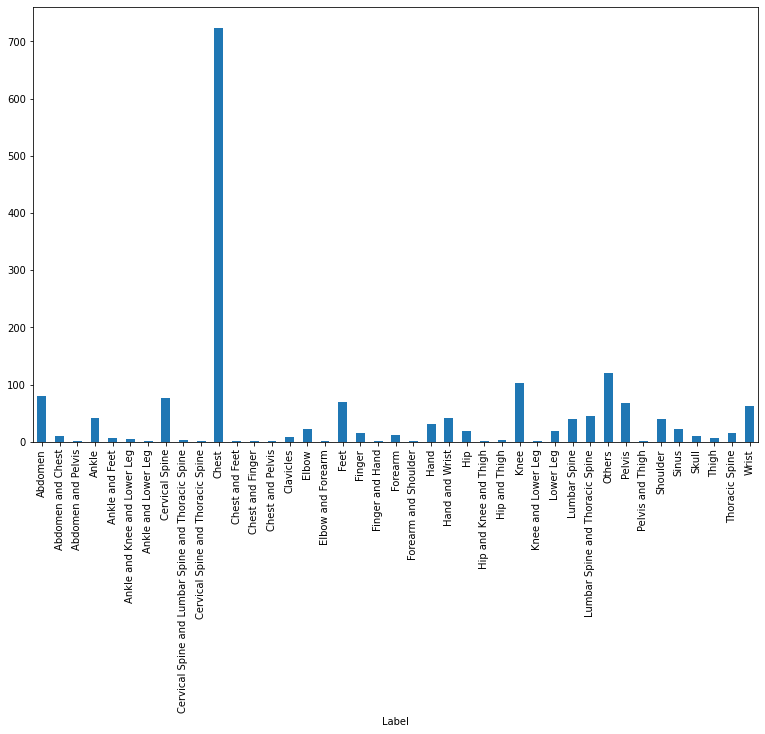

In [62]:
Grouped_target = train.groupby(by='Label').size()
%matplotlib inline
plt.rcParams["figure.figsize"] = (13,8)                              
Grouped_target.plot.bar()


In [63]:
train.Label.value_counts(normalize = True)

Chest                                                 0.416571
Others                                                0.069045
Knee                                                  0.058688
Abdomen                                               0.046030
Cervical Spine                                        0.044304
Feet                                                  0.040276
Pelvis                                                0.038550
Wrist                                                 0.036249
Lumbar Spine and Thoracic Spine                       0.025892
Hand and Wrist                                        0.024166
Ankle                                                 0.023590
Shoulder                                              0.023015
Lumbar Spine                                          0.022440
Hand                                                  0.017837
Sinus                                                 0.013234
Elbow                                                 0

In [64]:
train.Label.value_counts()

Chest                                                 724
Others                                                120
Knee                                                  102
Abdomen                                                80
Cervical Spine                                         77
Feet                                                   70
Pelvis                                                 67
Wrist                                                  63
Lumbar Spine and Thoracic Spine                        45
Hand and Wrist                                         42
Ankle                                                  41
Shoulder                                               40
Lumbar Spine                                           39
Hand                                                   31
Sinus                                                  23
Elbow                                                  23
Lower Leg                                              19
Hip           

In [65]:
#We will drop rows from training data when the rows is lesser than 10
v = train.Label.value_counts()
train = train[train.Label.isin(v.index[v.gt(9)])]

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['LabelCat'] = le.fit_transform(train['Target'])


In [68]:
# Creating Images for Training
!rm -r  ./TrainingImages
!mkdir ./TrainingImages

In [69]:
import pydicom as dicom
from PIL import Image, ImageOps
import os

images_path = "./TrainingImages"
ImagePath = []
file_name = train.Filename.to_list()
sop = train.SOPInstanceUID.to_list()
for file,sopId in tqdm(zip(file_name,sop)):
    ds = dicom.dcmread(file)
    normalized = ( ds.pixel_array - np.mean(ds.pixel_array) ) / np.std(ds.pixel_array)
    mat  = ( normalized + 1 ) /2
    img = Image.fromarray(np.uint8(mat * 255) , 'L')
    file_path = os.path.join(images_path,sopId+".png")
    img.save(file_path)
    ImagePath.append(file_path)
    
train['Imagepath'] = ImagePath

1688it [00:18, 90.29it/s] 


## Splitting dataframe from training and validation

In [70]:
#We are reserving 
train_data = train.sample(frac=0.9)
val_data = train.loc[~train['Filename'].isin(train_data['Filename'])].copy()

## Data augmentation we will not be using all augmentation since it x-Ray it will not make sense to do augmentations lise vertical flipping

In [71]:
class DataAugmentation:
    def __init__(self,train,val,batch_size):
        self.train = train
        self.val = val
        self.test = test
        self.batch_size = batch_size
        
    def train_augment(self):
        train_datagen = ImageDataGenerator(
            brightness_range=[0.4,1.5],# brightness
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True)
        
        
        train_generator_df = train_datagen.flow_from_dataframe(dataframe=self.train, 
                                              directory=None,
                                              class_mode='raw',
                                              x_col="Imagepath", 
                                              y_col="LabelCat", 
                                              target_size=(224, 224), 
                                              batch_size=self.batch_size,
                                              rescale=1.0/255,
                                              seed=2020)
        
        return train_generator_df
    
    
    def valid_augment(self):
        val_datagen = ImageDataGenerator()
        
        val_generator_df = val_datagen.flow_from_dataframe(dataframe=self.val, 
                                              directory=None,
                                              class_mode='raw',            
                                              x_col="Imagepath", 
                                              y_col="LabelCat", 
                                              target_size=(224, 224), 
                                              batch_size=self.batch_size,
                                              rescale=1.0/255,
                                              seed=2021)
        
        return val_generator_df
        
    
        
        
        
    
        
    

In [72]:
#Augment image for training
dat_aug = DataAugmentation(train_data,val_data,64)
train_gen = dat_aug.train_augment()
val_gen = dat_aug.valid_augment()

Found 1519 validated image filenames.
Found 169 validated image filenames.


## Load Resnet model and train model 

In [73]:
from keras.applications.resnet_v2 import ResNet50V2


In [74]:
resNet50 = ResNet50V2(weights="imagenet",input_shape=(224,224,3),include_top=False)
resNet50.trainable = False

## Freezing resNet50 layers for training and making last few layers ready for training

In [75]:
# deep learning libraries
import tensorflow as tf
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D

model = tf.keras.Sequential([
        resNet50,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
    # We are using last layer which is equal to number label catagories in training data
        tf.keras.layers.Dense(len(train['LabelCat'].unique()), activation='softmax')
    ])


## Training the model with F1 as metrics

In [76]:
from tensorflow.keras import backend as K

def f1(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [77]:
import tensorflow_addons as tfa

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy',f1])

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 2048)        14336     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [91]:

early = tf.keras.callbacks.EarlyStopping( patience=20,
                                          min_delta=0.0001,
                                          restore_best_weights=True)

In [92]:
# fit model
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=100,
                    callbacks=[early])

Epoch 1/100
24/24 [==============================] - 23s 954ms/step - loss: 1.4770 - accuracy: 0.5833 - f1: 5.4250 - val_loss: 1.4623 - val_accuracy: 0.5917 - val_f1: 5.7704
Epoch 2/100
24/24 [==============================] - 22s 937ms/step - loss: 1.4813 - accuracy: 0.5616 - f1: 5.4023 - val_loss: 1.3442 - val_accuracy: 0.6509 - val_f1: 4.8528
Epoch 3/100
24/24 [==============================] - 22s 911ms/step - loss: 1.4282 - accuracy: 0.5833 - f1: 5.1830 - val_loss: 1.3707 - val_accuracy: 0.6272 - val_f1: 5.4906
Epoch 4/100
24/24 [==============================] - 23s 937ms/step - loss: 1.4139 - accuracy: 0.5885 - f1: 5.1493 - val_loss: 1.4904 - val_accuracy: 0.5621 - val_f1: 4.6672
Epoch 5/100
24/24 [==============================] - 23s 932ms/step - loss: 1.3961 - accuracy: 0.5833 - f1: 4.8578 - val_loss: 1.3946 - val_accuracy: 0.6391 - val_f1: 5.3394
Epoch 6/100
24/24 [==============================] - 22s 908ms/step - loss: 1.3410 - accuracy: 0.6063 - f1: 5.0896 - val_loss: 1.3

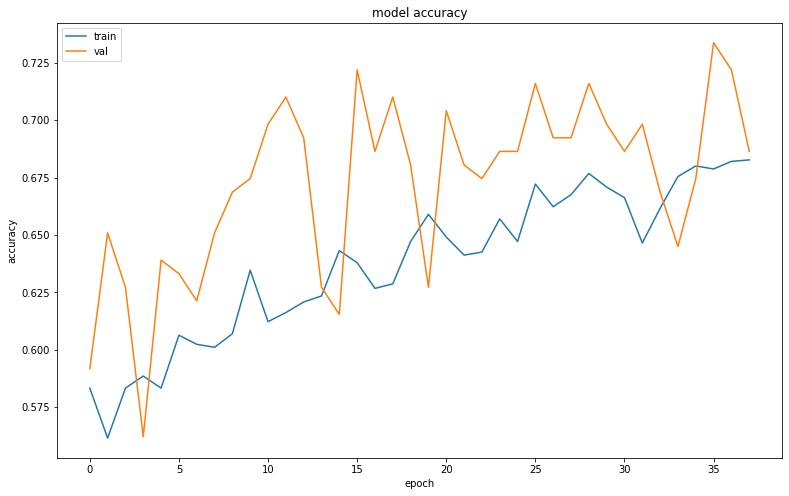

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Let us try to predict test data

In [95]:
!rm -r  testDir
!mkdir testDir
!mkdir testDir/Prediction

In [96]:
images_path = "./testDir/Prediction"
ImagePath = []
file_name = test.Filename.to_list()
sop = test.SOPInstanceUID.to_list()
for file,sopId in tqdm(zip(file_name,sop)):
    ds = dicom.dcmread(file)
    normalized = ( ds.pixel_array - np.mean(ds.pixel_array) ) / np.std(ds.pixel_array)
    mat  = ( normalized + 1 ) /2
    img = Image.fromarray(np.uint8(mat * 255) , 'L')
    file_path = os.path.join(images_path,sopId+".png")
    img.save(file_path)
    ImagePath.append(file_path)
    
test['Imagepath'] = ImagePath

743it [00:08, 85.83it/s]


In [97]:
import os

# folder path
dir_path = './testDir/Prediction'

# list to store files
os.listdir(dir_path)[:3]

['1.2.826.0.1.3680043.8.498.10673025979417954318270364293038199243.png',
 '1.2.826.0.1.3680043.8.498.58179576784532254276457193193042883401.png',
 '1.2.826.0.1.3680043.8.498.10980601764063535987173928532156208070.png']

In [98]:
# Create a new column with label
target_list = test['Target'].tolist()
label_column = []

for label in tqdm(target_list):
    label_string = no_to_label(label)
    label_column.append(label_string)
test['Label'] = label_column

#Now we can see the distribution
test['Label'].unique()

100%|██████████| 743/743 [00:00<00:00, 53550.44it/s]


array(['Abdomen and Ankle and Cervical Spine and Chest and Clavicles and Elbow and Feet and Finger and Forearm and Hand and Hip and Knee and Lower Leg and Lumbar Spine and Others and Pelvis and Shoulder and Sinus and Skull and Thigh and Thoracic Spine and Wrist'],
      dtype=object)

## Generate Test generator for prediction

In [99]:
from pathlib import Path

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_path = Path('./testDir')
test_generator = test_datagen.flow_from_directory(
    directory= test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 743 images belonging to 1 classes.


In [100]:
# Predicting the test 
prediction = model.predict(test_generator)


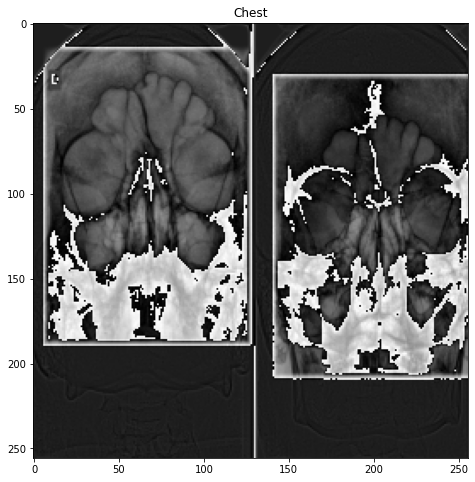

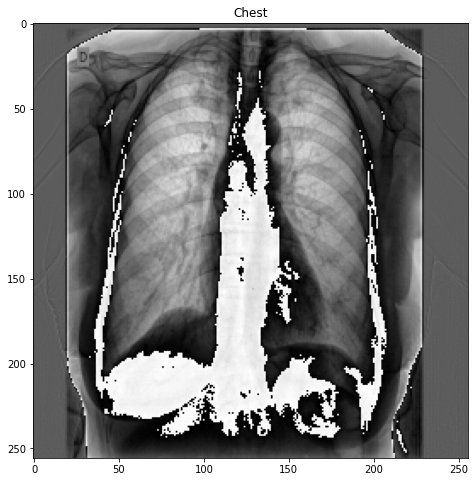

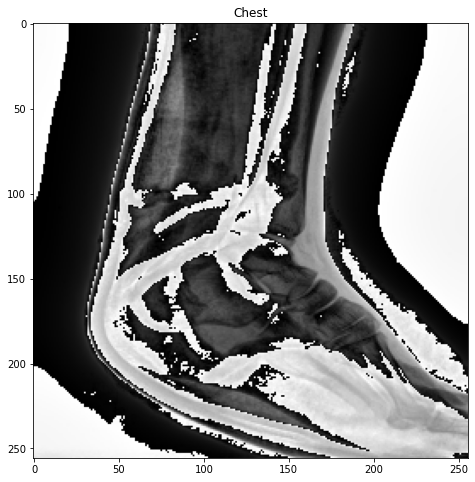

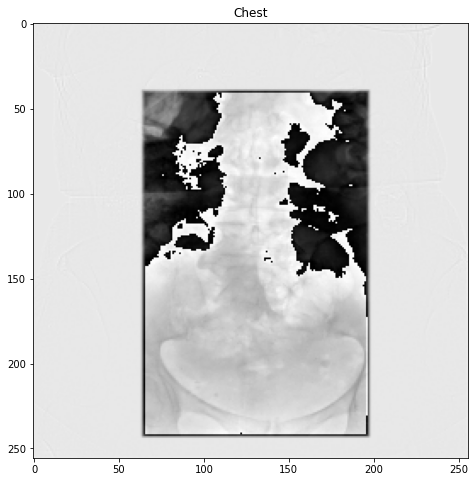

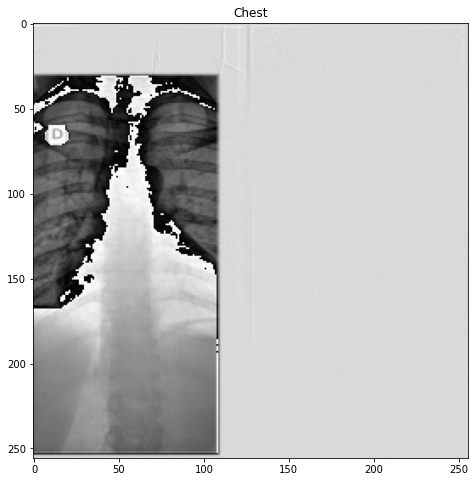

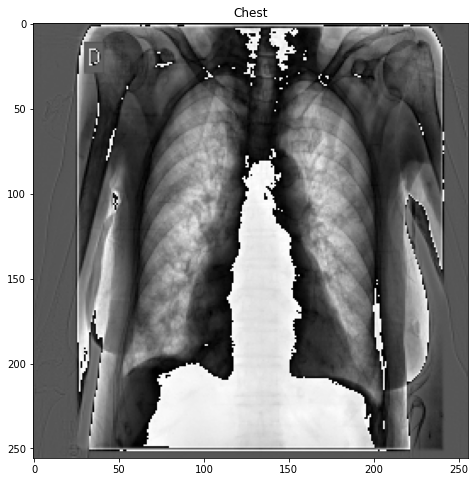

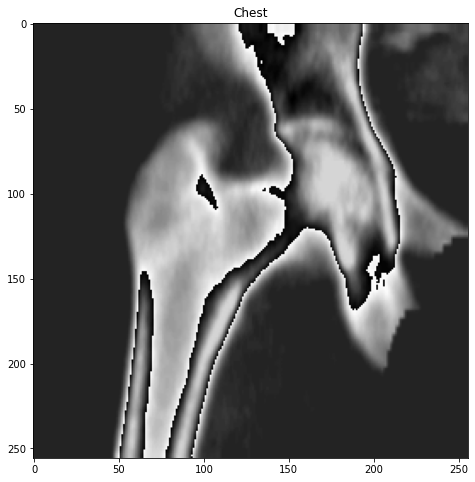

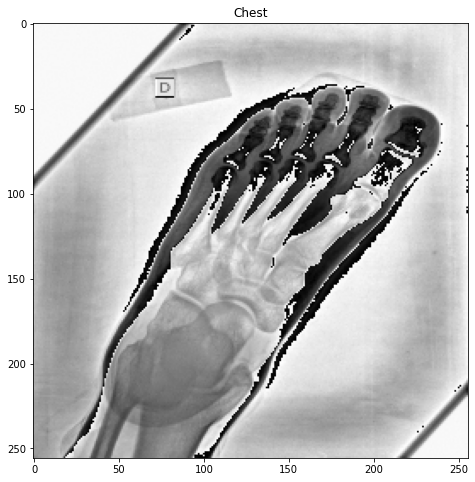

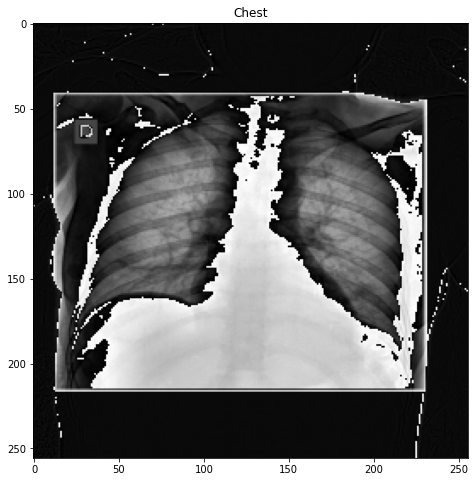

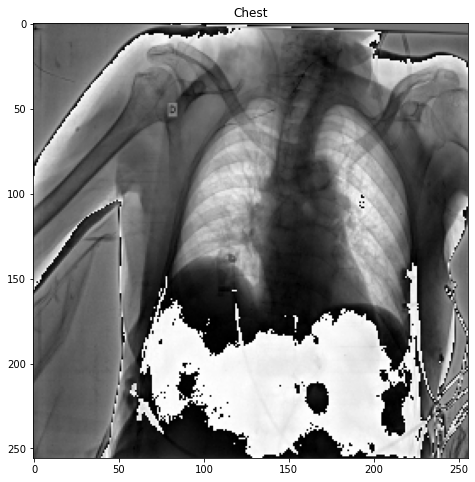

In [101]:
test_path = './testDir/Prediction'
first_ten_prediction = prediction[:10]
first_ten_images = os.listdir(test_path)[:10]
data = []

for file,prediction in zip(first_ten_images,first_ten_prediction): 
    
    img = cv2.imread(os.path.join(test_path,file))
    data.append(img) 
    plt.figure() 
    label = prediction.argmax(axis=-1)
    title = train.loc[train['LabelCat'] == label, 'Label'].iloc[0]
    Target = train.loc[train['LabelCat'] == label, 'Target'].iloc[0]
    plt.title(title)
    plt.imshow(img) 



## Not very correct could be improved

## Generating submission file

In [102]:
submission = pd.read_csv('../input/unifesp-xray-bodypart-classification/sample_submission.csv')

In [104]:
prediction = model.predict(test_generator)

In [106]:
#Generating Target through model predictions
Target = []
for predict in prediction:
    label = predict.argmax(axis=-1)
    Target.append(train.loc[train['LabelCat'] == label, 'Target'].iloc[0])
    
submission['Target'] = Target

In [107]:
submission.to_csv('./submission.csv')